### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ


#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 8


#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Гебриал Ибрам Есам Зекри
##### Группа:   НПИбд-01-18

## Москва 2021
***

### вариант 1

Annealing Data Set 

Название файла: anneal.data 

Ссылка: https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/ 

Предиктор: thick (столбец No 33) 

Зависимая переменная: width (столбец No 34) 

1. Считайте заданный набор данных из репозитария UCI (независимую и зависимую переменные).

2. Если в столбцах для независимой или зависимой переменных имеются пропущенные значения, то удалите данные.

3. Масштабируйте независимую и зависимую переменную на диапазон от 0 до 1 и визуализируйте набор данных на плоскости (ось абсцисс - независимая переменная, ось ординат - зависимая переменная).

4. Разбейте набор данных на обучающую и тестовую выборки.

5. Постройте регресоры на базе следующих моделей регрессии:

- линейной регрессии (LinearRegression)
- полиномиальной регрессии (PolynomialFeatures+LinearRegression)
- стохастического градиентного спуска (SGDRegressor)
- гребневой регрессии (Ridge)
- лассо регрессии (Lasso)
- регрессии эластичная сеть (ElasticNet)
- регрессии на основе метода ближайших соседей (KNeighborsRegressor)
- регрессии на основе деревьев решений (DecisionTreeRegressor)
- регрессии на основе метода опорных векторов (SVR)

6. При помощи GridSearch определите оптимальные параметры регрессоров (кроме LinearRegression).

7. Визуализируйте на плоскости точки тестовой выборки и графики различных моделей регрессий разными цветами. Подпишите оси и создайте легенду для графика.

8. Определите лучший регрессор по показателю коэффициент детерминации.

9. Для лучшего регрессора визуализируйте кривые обучения (в зависимости от количества точек в обучающей выборке).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### 1. Считайте заданный набор данных из репозитария UCI (независимую и зависимую переменные).

In [2]:
url = \
"https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data"
# считываем данные в объект DataFrame
my_data = pd.read_csv( url,sep="," ,header=None,usecols=(32,33) )
my_data.columns = ['thick', 'width']
print("\n*** Начало данных:\n", my_data.head()) #начальные данные
print("\n*** Конец данных:\n",  my_data.tail()) #конечные данные

summary = my_data.describe()                    #сводка данных 
print("\n*** Сводка данных:\n", summary)


*** Начало данных:
    thick   width
0  0.700   610.0
1  3.200   610.0
2  0.700  1300.0
3  2.801   385.1
4  0.801   255.0

*** Конец данных:
      thick   width
793  1.001    50.0
794  0.699  1300.0
795  0.400   609.9
796  3.200   610.0
797  1.599  1500.0

*** Сводка данных:
             thick        width
count  798.000000   798.000000
mean     1.181847   781.744361
std      0.861608   404.722346
min      0.250000     0.000000
25%      0.601000   609.900000
50%      0.800000   610.000000
75%      1.600000  1250.000000
max      4.000000  1525.000000


In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   thick   798 non-null    float64
 1   width   798 non-null    float64
dtypes: float64(2)
memory usage: 12.6 KB


#### 2. Если в столбцах для независимой или зависимой переменных имеются пропущенные значения, то удалите данные

In [3]:
my_data = my_data.replace('?',np.NaN) # заменить '?' на np.NaN
print('Число отсутствующих значений:')
for col in my_data.columns:
    print('\t%s: %d' % (col,my_data[col].isna().sum()))

Число отсутствующих значений:
	thick: 0
	width: 0


У меня нет пропущенных значений

#### 3. Масштабируйте независимую и зависимую переменную на диапазон от 0 до 1 и визуализируйте набор данных на плоскости (ось абсцисс - независимая переменная, ось ординат - зависимая переменная)

In [4]:
from sklearn.preprocessing import MinMaxScaler
np.set_printoptions(precision=3)
scaler = MinMaxScaler(feature_range=(0, 1))
my_data = scaler.fit_transform(my_data[["thick","width"]])

print(my_data[:5,:])

[[0.12  0.4  ]
 [0.787 0.4  ]
 [0.12  0.852]
 [0.68  0.253]
 [0.147 0.167]]


In [5]:
x=my_data[:,0]
y=my_data[:, 1]

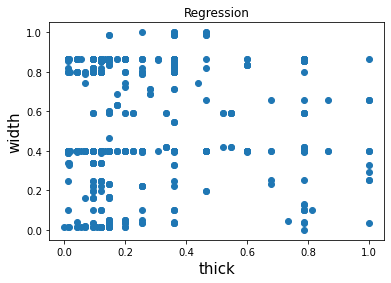

In [6]:
plt.xlabel('thick', fontsize = 15)
plt.ylabel('width', fontsize = 15)
plt.title('Regression')
plt.scatter(x,y)
plt.show()

#### 4. Разбейте набор данных на обучающую и тестовую выборки.

In [7]:
def train_test_split(X, y, test_ratio=0.2, seed=None):
    
    assert X.shape[0] == y.shape[0], \
        "the size of X must be equal to the size of y"
    assert 0.0 <= test_ratio <= 1.0, \
        "test_ration must be valid"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((639,), (159,), (639,), (159,))

In [35]:
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
X_train.shape, X_test.shape

((639, 1), (159, 1))

#### 5. Постройте регресоры на базе следующих моделей регрессии:

- линейной регрессии (LinearRegression)
- полиномиальной регрессии (PolynomialFeatures+LinearRegression)
- стохастического градиентного спуска (SGDRegressor)
- гребневой регрессии (Ridge)
- лассо регрессии (Lasso)
- регрессии эластичная сеть (ElasticNet)
- регрессии на основе метода ближайших соседей (KNeighborsRegressor)
- регрессии на основе деревьев решений (DecisionTreeRegressor)
- регрессии на основе метода опорных векторов (SVR)

In [24]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

линейной регрессии (LinearRegression)

In [36]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)


0.0014953635609966653

полиномиальной регрессии (PolynomialFeatures+LinearRegression)

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train, y_train)
poly2_reg.score(X_test, y_test)


-0.001119822160879913

стохастического градиентного спуска (SGDRegressor)

In [38]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_standard, y_train)
sgd_reg.score(X_test_standard, y_test)


-0.007378262493521026

гребневой регрессии (Ridge)

In [39]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)

ridge1_reg.score(X_test, y_test)


0.00029754103037538115

лассо регрессии (Lasso)

In [40]:
from sklearn.linear_model import Lasso
def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)
y1_predict = lasso1_reg.predict(X_test)
lasso1_reg.score(X_test, y_test)


-0.003993244255765305

регрессии эластичная сеть (ElasticNet)

In [41]:
from sklearn.linear_model import ElasticNet

def ElNetRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("elnet_reg", ElasticNet(alpha=alpha))
    ])

elnet1_reg = ElNetRegression(20, 0.01)
elnet1_reg.fit(X_train, y_train)

y1_predict = elnet1_reg.predict(X_test)
elnet1_reg.score(X_test, y_test)



-0.004156177004614792

регрессии на основе метода ближайших соседей (KNeighborsRegressor)

In [42]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_standard, y_train)
knn_reg.score(X_test_standard, y_test)


-0.2728894596441436

регрессии на основе деревьев решений (DecisionTreeRegressor)

In [43]:
from sklearn.tree import DecisionTreeRegressor

def TreeRegression(max_leaf_nodes=None):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("tree_reg", DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes))
    ])

tree1_reg = TreeRegression(4)
tree1_reg.fit(X_train, y_train)

y1_predict = tree1_reg.predict(X_test)
tree1_reg.score(X_test, y_test)


-0.00029659723125474713

регрессии на основе метода опорных векторов (SVR)

In [44]:
from sklearn.svm import SVR

def SVMRegression(degree):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svm_reg", SVR(kernel='poly',degree=degree))
    ])
svm1_reg = SVMRegression(5)
svm1_reg.fit(X_train, y_train)

y1_predict = svm1_reg.predict(X_test)
svm1_reg.score(X_test, y_test)


-0.005624957161050048

#### 6. При помощи GridSearch определите оптимальные параметры регрессоров (кроме LinearRegression).

In [45]:
from sklearn.model_selection import GridSearchCV

полиномиальной регрессии (PolynomialFeatures+LinearRegression)

In [46]:
param_grid = [
    {
        "poly__degree": [i for i in range(1, 100)]
    }
]

grid_searchPoly = GridSearchCV(poly2_reg, param_grid, n_jobs = -1, verbose = 1)
grid_searchPoly.fit(X_train, y_train)

grid_searchPoly.best_params_

Fitting 5 folds for each of 99 candidates, totalling 495 fits


{'poly__degree': 4}

стохастического градиентного спуска (SGDRegressor)

In [47]:
param_grid_sgd_reg = [
    {
        "max_iter": [i for i in range(100, 10000, 5)]
    }
]

grid_searchSgd = GridSearchCV(sgd_reg, param_grid_sgd_reg, n_jobs=-1, verbose=1)
grid_searchSgd.fit(X_train, y_train)
grid_searchSgd.best_params_

Fitting 5 folds for each of 1980 candidates, totalling 9900 fits


{'max_iter': 3705}

гребневой регрессии (Ridge)

In [48]:
param_grid_ridge_reg = [
    {
        "poly__degree": [i for i in range(1, 100)],
        "ridge_reg__alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    }
]

grid_searchRidge = GridSearchCV(ridge1_reg, param_grid_ridge_reg, n_jobs=-1, verbose=1)
grid_searchRidge.fit(X_train, y_train)
grid_searchRidge.best_params_

Fitting 5 folds for each of 792 candidates, totalling 3960 fits


{'poly__degree': 4, 'ridge_reg__alpha': 1e-05}

лассо регрессии (Lasso)

In [49]:
import warnings
warnings.filterwarnings("ignore")

param_grid_lasso_reg = [
    {
        "poly__degree": [i for i in range(1, 100)],
        "lasso_reg__alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    }
]

grid_searchLasso = GridSearchCV(lasso1_reg, param_grid_lasso_reg, n_jobs=-1, verbose=1)
grid_searchLasso.fit(X_train, y_train)
grid_searchLasso.best_params_

Fitting 5 folds for each of 792 candidates, totalling 3960 fits


{'lasso_reg__alpha': 1e-05, 'poly__degree': 7}

регрессии эластичная сеть (ElasticNet)

In [50]:
param_grid_elnet_reg = [
    {
        "poly__degree": [i for i in range(1, 100)],
        "elnet_reg__alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    }
]

grid_searchElasticNet = GridSearchCV(elnet1_reg, param_grid_elnet_reg, n_jobs=-1, verbose=1)
grid_searchElasticNet.fit(X_train, y_train)
grid_searchElasticNet.best_params_

Fitting 5 folds for each of 792 candidates, totalling 3960 fits


{'elnet_reg__alpha': 1e-05, 'poly__degree': 7}

регрессии на основе метода ближайших соседей (KNeighborsRegressor)

In [28]:
param_grid = [
    {
        "weights": ["uniform"],
        "n_neighbors": [i for i in range(1, 11)]
    },
    {
        "weights": ["distance"],
        "n_neighbors": [i for i in range(1, 11)],
        "p": [i for i in range(1, 6)]
    }
]

grid_searchKnn = GridSearchCV(knn_reg, param_grid, n_jobs = -1, verbose = 1)
grid_searchKnn.fit(X_train, y_train)
grid_searchKnn.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'n_neighbors': 10, 'weights': 'uniform'}

регрессии на основе деревьев решений (DecisionTreeRegressor)

In [51]:
param_grid = [
    {
        "tree_reg__max_leaf_nodes": [i for i in range (1, 100)]
    }
]

grid_searchTree = GridSearchCV(tree1_reg, param_grid, n_jobs = -1, verbose = 1)
grid_searchTree.fit(X_train, y_train)
grid_searchTree.best_params_

Fitting 5 folds for each of 99 candidates, totalling 495 fits


{'tree_reg__max_leaf_nodes': 3}

регрессии на основе метода опорных векторов (SVR)

In [52]:
param_grid = [
    {
        "svm_reg__degree": [i for i in range(1, 5)]
    }
]

grid_searchSvm = GridSearchCV(svm1_reg, param_grid, n_jobs = -1, verbose = 1)
grid_searchSvm.fit(X_train, y_train)
grid_searchSvm.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'svm_reg__degree': 4}

#### 7. Визуализируйте на плоскости точки тестовой выборки и графики различных моделей регрессий разными цветами. Подпишите оси и создайте легенду для графика.

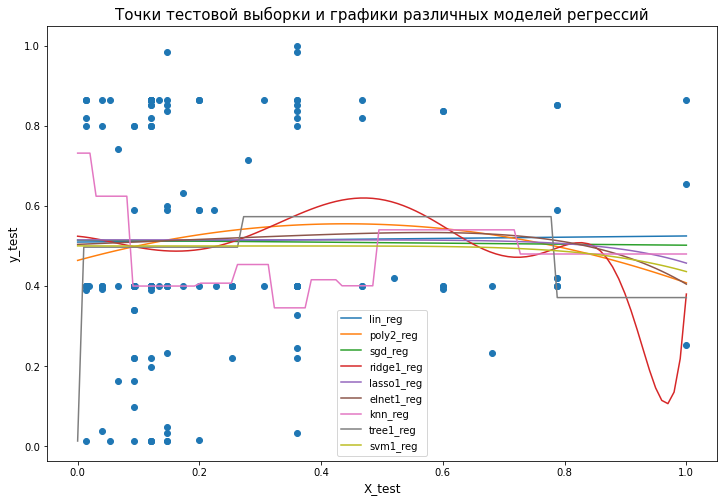

In [69]:
plt.figure(figsize=(12, 8))
X_plot = np.linspace(0, 1, 100).reshape(100, 1)
plt.title('Точки тестовой выборки и графики различных моделей регрессий', fontsize = 15)
plt.scatter(X_test, y_test)
plt.plot(X_plot[:,0], lin_reg.predict(X_plot), label = 'lin_reg')
plt.plot(X_plot[:,0], poly2_reg.predict(X_plot), label = 'poly2_reg')
plt.plot(X_plot[:,0], sgd_reg.predict(X_plot), label = 'sgd_reg')
plt.plot(X_plot[:,0], ridge1_reg.predict(X_plot), label = 'ridge1_reg')
plt.plot(X_plot[:,0], lasso1_reg.predict(X_plot), label = 'lasso1_reg')
plt.plot(X_plot[:,0], elnet1_reg.predict(X_plot), label = 'elnet1_reg')

plt.plot(X_plot[:,0], knn_reg.predict(X_plot), label = 'knn_reg')

plt.plot(X_plot[:,0], tree1_reg.predict(X_plot), label = 'tree1_reg')
plt.plot(X_plot[:,0], svm1_reg.predict(X_plot), label = 'svm1_reg')

plt.xlabel('X_test', fontsize = 12)
plt.ylabel('y_test', fontsize = 12)

plt.legend()
plt.show()



#plt.plot(X_plot[:,0], y_plot, label=model)

#### 8. Определите лучший регрессор по показателю коэффициент детерминации.

линейной регрессии

#### 9. Для лучшего регрессора визуализируйте кривые обучения (в зависимости от количества точек в обучающей выборке).

In [58]:
from sklearn.metrics import mean_squared_error

def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(test_score), label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 0.5]) # np.sqrt(test_score).max()
    plt.show()

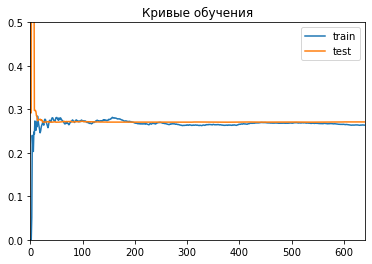

In [59]:
plt.title('Кривые обучения')
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)